# Homework 1

In [31]:
#pip install pandas_datareader

In [32]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

pd.options.display.max_rows = 20

## Getting stock data

We can use `pandas_datareader` to download historical price data from Yahoo! Finance. For example, here's data for Amazon beginning in 2020.

In [33]:
pdr.get_data_yahoo('AMZN', 2020)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971
...,...,...,...,...,...,...
2021-02-25,3178.260010,3047.760010,3136.739990,3057.159912,4533800,3057.159912
2021-02-26,3122.439941,3036.699951,3095.199951,3092.929932,4273500,3092.929932
2021-03-01,3149.560059,3097.989990,3127.889893,3146.139893,2729100,3146.139893


We can loop over tickers and create a DataFrame of closing price data like this:

In [34]:
tics = ['AMZN', 'PFE', 'GE', 'TSLA']

px = pd.DataFrame({tic: pdr.get_data_yahoo(tic, 2011)['Adj Close']
                   for tic in tics})

In [35]:
px

,AMZN,PFE,GE,TSLA
Date,,,,
2011-01-03,184.220001,11.495119,13.383633,5.324000
2011-01-04,185.009995,11.696674,13.625245,5.334000
2011-01-05,187.419998,11.774692,13.647206,5.366000
2011-01-06,185.860001,11.820204,13.588632,5.576000
2011-01-07,185.490005,11.924233,13.493458,5.648000
...,...,...,...,...
2021-02-25,3057.159912,33.820000,12.760000,682.219971
2021-02-26,3092.929932,33.490002,12.540000,675.500000
2021-03-01,3146.139893,33.689999,13.110000,718.429993


One way to plot prices is to create an index by initializing each price to 1.

In [36]:
#px.iloc[0]

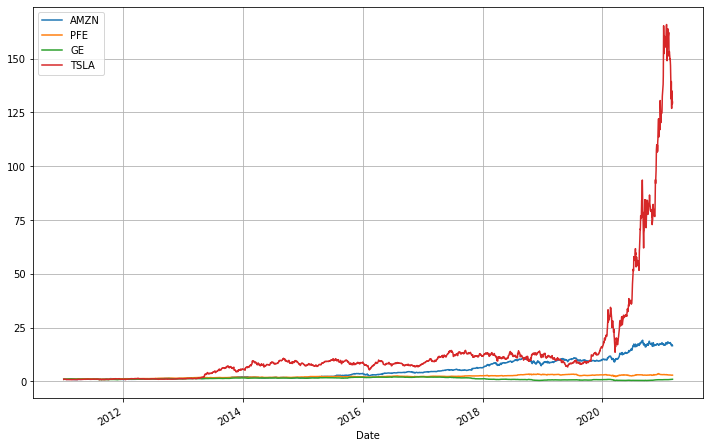

In [37]:
(px / px.iloc[0]).plot(figsize=(12,8), grid=True)

Tesla's huge return makes it hard to see the performance of the other stocks here. Change the graph so that the scale on the y-axis is in logs. (You can do this without modifying the data; you just need to use an argument to the `plot` function.)

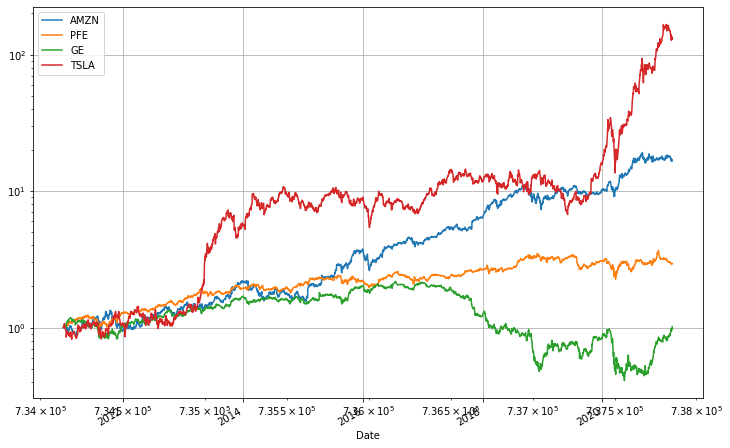

In [38]:
(px / px.iloc[0]).plot(figsize=(12,8), grid=True, loglog = True)

Calculate a daily return series for each stock using these prices.

In [39]:
daily_return = px.pct_change(1)

Use the `.describe()` method to calculate summary statistics on returns. Do the statistics look reasonable? Give a couple examples of what gives you confidence that these make sense.

In [40]:
daily_return.describe()

,AMZN,PFE,GE,TSLA
count,2557.000000,2557.000000,2557.000000,2557.000000
mean,0.001297,0.000505,0.000211,0.002511
std,0.019887,0.012831,0.020252,0.034955
min,-0.126568,-0.077347,-0.151592,-0.210628
25%,-0.008220,-0.005550,-0.008344,-0.014519
50%,0.001071,0.000267,0.000000,0.001221
75%,0.011324,0.006536,0.008237,0.018809
max,0.157457,0.089607,0.147300,0.243951


The statistics seem reasonable, starting with the count, as the original table had 2552 observations, so it would make sense that this has one less to remove the first observation. Another indication that these are reasonable is that Tesla has the largest average increase, standard deviation and maximum daily returns.

Now calculate the correlation matrix for these returns.

In [41]:
daily_return.corr()

,AMZN,PFE,GE,TSLA
AMZN,1.000000,0.294438,0.243883,0.326031
PFE,0.294438,1.000000,0.389318,0.188484
GE,0.243883,0.389318,1.000000,0.224968
TSLA,0.326031,0.188484,0.224968,1.000000


This function takes a DataFrame and returns a “long” DataFrame of pairwise correlations:

In [42]:
def pairwise_corr(df):
    corrs = df.corr()
    corrs = corrs.unstack().reset_index()
    corrs.columns = ['tic1', 'tic2', 'corr']
    corrs = corrs[corrs['corr']<1]
    return corrs

Call this function with the returns data. Does the number of rows in the result make sense? Why?

Hint: Pay close attention to the index here!

In [43]:
pc_dr = pairwise_corr(daily_return)
pc_dr

,tic1,tic2,corr
1,AMZN,PFE,0.294438
2,AMZN,GE,0.243883
3,AMZN,TSLA,0.326031
4,PFE,AMZN,0.294438
6,PFE,GE,0.389318
7,PFE,TSLA,0.188484
8,GE,AMZN,0.243883
9,GE,PFE,0.389318
11,GE,TSLA,0.224968
12,TSLA,AMZN,0.326031


The number of rows makes sense, because the function removes the correlations of columns against themselves.

What is the *average* correlation of these firms? Be sure to count each correlation only once.

In [44]:
pc_dr.groupby(["tic1"]).mean()

,corr
tic1,
AMZN,0.288117
GE,0.286056
PFE,0.290747
TSLA,0.246494


In [45]:
print(pc_dr["corr"].mean())

0.27785362458456053


Take the code you just wrote and build a *function* that takes a DataFrame and returns a single number giving the average pairwise correlation across firms. Test your function on the data returns data you used above.

In [46]:
def avg_pwcorr(df):
    corr_df = pairwise_corr(df)
    return corr_df["corr"].mean()

In [47]:
avg_pwcorr(daily_return)

0.27785362458456053

Use `groupby` to calculate the average pairwise correlation in each year by using `apply` to apply the function you just created to the data by year.

Discuss anything you notice about the result.

Hint: When you have an index with a datetime value you can pass an argument like this to group by year:

`df.gropuby(df.index.year)`

In [48]:
daily_return.groupby(daily_return.index.year).apply(avg_pwcorr)

Date
2011    0.475093
2012    0.284090
2013    0.197155
2014    0.332305
2015    0.358398
2016    0.264868
2017    0.069284
2018    0.271395
2019    0.244283
2020    0.307069
2021    0.115032
dtype: float64

The returns have the strongest pairwise correlation average in 2011, while 2017 and 2021 stand out as very poorly correlating years.

## The Dow Jones Industrial Average

The code below creates a DataFrame from a table from Wikipedia containing the current components of the Dow Jones Industrial Average.

In [49]:
dow = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

dow[0:20]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M Company,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.74%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,2.71%
2,Amgen,NASDAQ,AMGN,Pharmaceutical industry,2020-08-31,NaN,4.96%
3,Apple Inc.,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.83%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,4.41%
5,Caterpillar Inc.,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.14%
6,Chevron Corporation,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,1.94%
7,Cisco Systems,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.99%
8,The Coca-Cola Company,NYSE,KO,Food industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.06%
9,Dow Inc.,NYSE,DOW,Chemical industry,2019-04-02,NaN,1.22%


Iterate over the `Symbol` column and use the code from earlier to construct a new DataFrame of returns for these 30 stocks beginning in 2001.

(These stocks have not all been part of the DJIA since 2001, but we'll use these companies as a sample anyway.)

In [50]:
symbol_list = dow["Symbol"].tolist()
dow_returns = pd.DataFrame()
for tic in symbol_list:
    name = tic
    dow_returns[name] = pdr.get_data_yahoo(name,2001)["Adj Close"]

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,-0.011537,0.077379,0.066601,0.100842,0.009073,0.004049,-0.038546,0.240150,-0.025694,NaN,...,0.033487,-0.049363,NaN,-0.009732,-0.029693,0.057214,NaN,-0.038284,0.084687,0.111857
2001-01-04,0.010080,-0.031285,-0.065238,0.041985,-0.024976,0.047042,-0.021180,0.013616,-0.028480,NaN,...,0.025698,-0.030988,NaN,-0.046683,-0.069946,0.029411,NaN,-0.049363,-0.038503,0.028169
2001-01-05,-0.037290,-0.048443,-0.069791,-0.040294,-0.036884,-0.057766,0.007729,-0.125373,0.002171,NaN,...,-0.043573,0.036301,NaN,-0.018041,0.014101,-0.002285,NaN,0.018426,-0.040044,-0.013699
2001-01-08,0.006001,-0.050909,0.006431,0.011450,0.004255,-0.002725,-0.002301,-0.002133,0.016252,NaN,...,0.050114,0.021685,NaN,0.028872,-0.003476,0.001338,NaN,0.008223,0.000000,-0.043651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-25,0.006361,-0.020087,-0.010740,-0.034783,-0.056205,-0.002922,-0.009292,-0.004810,-0.010649,-0.026036,...,-0.000811,-0.008460,-0.039049,-0.019608,-0.010054,-0.010854,-0.025885,-0.018304,-0.009459,-0.033062
2021-02-26,-0.020698,-0.013277,-0.011428,0.002232,-0.020513,-0.026778,-0.022960,-0.014279,-0.023520,-0.033252,...,-0.003585,-0.024095,-0.063095,-0.016892,0.010186,-0.021239,-0.006363,-0.007044,-0.015385,-0.010158
2021-03-01,0.007712,0.025507,0.009426,0.053851,0.058393,0.017973,0.020500,0.023401,0.018575,0.037599,...,0.021294,0.006152,0.004804,0.033608,0.007314,0.001085,0.019963,-0.001669,0.011161,0.031422


In [51]:
daily_returns_dow = dow_returns.pct_change(1)

Calculate the correlation matrix for these stocks. Verify that the number of rows and columns in the matrix makes sense.

In [23]:
daily_returns_dow.corr()

,MMM,AXP,AMGN,AAPL,BA,CAT,CVX,CSCO,KO,DOW,...,NKE,PG,CRM,TRV,UNH,VZ,V,WBA,WMT,DIS
MMM,1.000000,0.557301,0.397986,0.389582,0.488736,0.612257,0.528969,0.463738,0.468397,0.600597,...,0.463169,0.467904,0.374548,0.505197,0.399711,0.420834,0.501906,0.428157,0.407472,0.527672
AXP,0.557301,1.000000,0.366228,0.405821,0.536071,0.573143,0.538182,0.475742,0.427119,0.651915,...,0.486931,0.395470,0.394081,0.574393,0.409872,0.437446,0.612881,0.393177,0.369471,0.601891
AMGN,0.397986,0.366228,1.000000,0.323432,0.317313,0.346015,0.358005,0.366010,0.328209,0.412399,...,0.302348,0.372699,0.309060,0.355325,0.356173,0.340595,0.396807,0.335066,0.344844,0.383087
AAPL,0.389582,0.405821,0.323432,1.000000,0.332455,0.404247,0.335547,0.481781,0.290496,0.455679,...,0.366564,0.279493,0.401537,0.335585,0.286243,0.308948,0.497586,0.266642,0.307049,0.396900
BA,0.488736,0.536071,0.317313,0.332455,1.000000,0.507448,0.515600,0.371891,0.408987,0.561147,...,0.423372,0.350096,0.340734,0.442879,0.364676,0.327115,0.467293,0.370520,0.309825,0.504406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VZ,0.420834,0.437446,0.340595,0.308948,0.327115,0.387239,0.406964,0.397303,0.427642,0.470308,...,0.362583,0.430247,0.332214,0.425593,0.288782,1.000000,0.396238,0.323244,0.415757,0.456947
V,0.501906,0.612881,0.396807,0.497586,0.467293,0.504724,0.515739,0.516325,0.403220,0.603812,...,0.489016,0.413271,0.483600,0.504540,0.411322,0.396238,1.000000,0.357729,0.357437,0.538287
WBA,0.428157,0.393177,0.335066,0.266642,0.370520,0.386128,0.371402,0.307112,0.365002,0.472045,...,0.346284,0.383586,0.278112,0.352336,0.343121,0.323244,0.357729,1.000000,0.395584,0.373525
WMT,0.407472,0.369471,0.344844,0.307049,0.309825,0.348999,0.300920,0.368716,0.368061,0.355123,...,0.382748,0.426719,0.269936,0.389733,0.299209,0.415757,0.357437,0.395584,1.000000,0.392297


Which pair of companies are maximally or minimally correlated during this period? What are these correlations?

In [24]:
dow_pwcorr = pairwise_corr(daily_returns_dow)

In [25]:
dow_pwcorr.sort_values(by="corr", ascending=False)
#.idxmax()

,tic1,tic2,corr
275,DOW,CAT,0.765454
159,CAT,DOW,0.765454
316,GS,JPM,0.747953
490,JPM,GS,0.747953
46,AXP,JPM,0.717971
...,...,...,...
813,WBA,AAPL,0.266642
234,CSCO,UNH,0.263086
727,UNH,CSCO,0.263086
108,AAPL,MRK,0.260353


As above, use `groupby` to calculate the average pairwise correlation in each year for these stocks. Plot the result.

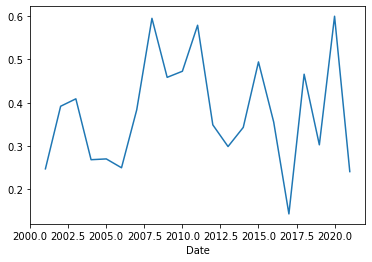

In [26]:
yearly_pairwise = daily_returns_dow.groupby(daily_returns_dow.index.year).apply(avg_pwcorr)
yearly_pairwise.plot()

## Market return data

As a proxy for the return on the market, get download data for the S&P 500 index (ticker symbol: ^GSPC).

In [57]:
market = pdr.get_data_yahoo("^GSPC",2001)

In [151]:
market[495:510]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-12-24,897.380005,892.289978,897.380005,892.469971,458310000,892.469971
2002-12-26,903.890015,887.479980,892.469971,889.659973,721100000,889.659973
2002-12-27,890.460022,873.619995,889.659973,875.400024,758400000,875.400024
2002-12-30,882.099976,870.229980,875.400024,879.390015,1057800000,879.390015
2002-12-31,881.929993,869.450012,879.390015,879.820007,1088500000,879.820007
2003-01-02,909.030029,879.820007,879.820007,909.030029,1229200000,909.030029
2003-01-03,911.250000,903.070007,909.030029,908.590027,1130800000,908.590027
2003-01-06,931.770020,908.590027,908.590027,929.010010,1435900000,929.010010
2003-01-07,930.809998,919.929993,929.010010,922.929993,1545200000,922.929993


In [100]:
market_returns = market.pct_change(1)

In [148]:
market_returns

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,0.020814,-0.001121,-0.028032,0.050099,0.665220,0.050099
2001-01-04,0.001840,0.042774,0.050099,-0.010552,0.133089,-0.010552
2001-01-05,-0.011457,-0.025723,-0.010552,-0.026242,-0.328578,-0.026242
2001-01-08,-0.027286,-0.014410,-0.026242,-0.001918,-0.220366,-0.001918
...,...,...,...,...,...,...
2021-02-17,-0.004258,-0.005969,-0.005358,-0.000320,-0.063343,-0.000320
2021-02-18,-0.002957,-0.003948,-0.000674,-0.004416,0.011689,-0.004416
2021-02-19,0.002149,0.004643,0.001353,-0.001855,0.010581,-0.001855


Calculate the average return on the index in each year. A typical year has 252 trading days, so multiply the result by 252 to get the annualized return.

In [141]:
market_annual = market_returns.groupby(market_returns.index.year).apply(np.mean,axis=0)
market_annual_df = pd.DataFrame(market_annual)
#market_annual_df.columns = ["avg_daily_returns"]
market_annual_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001,-0.000455,-0.000345,-0.000428,-0.000360,0.021451,-0.000360
2002,-0.001009,-0.000995,-0.000970,-0.000922,0.020650,-0.000922
2003,0.000962,0.000996,0.000981,0.000987,0.019790,0.000987
2004,0.000373,0.000379,0.000380,0.000366,0.011151,0.000366
2005,0.000131,0.000127,0.000152,0.000138,0.015707,0.000138
...,...,...,...,...,...,...
2017,0.000715,0.000725,0.000715,0.000716,0.012902,0.000716
2018,-0.000246,-0.000235,-0.000237,-0.000199,0.015092,-0.000199
2019,0.001027,0.001051,0.001024,0.001038,0.015778,0.001038


In [152]:
market_annual_df["Annualized_Returns"] = ((1 + market_annual_df["Adj Close"])**252)-1
market_annualized = market_annual_df["Annualized_Returns"]
market_annualized

Date
2001   -0.086730
2002   -0.207440
2003    0.282227
2004    0.096634
2005    0.035448
          ...   
2017    0.197707
2018   -0.048889
2019    0.298815
2020    0.233208
2021    0.292194
Name: Annualized_Returns, Length: 21, dtype: float64

Combine the index annual return data with the average correlation data.

You can use `pd.merge` but `pd.concat` migh be easier if you first make sure both Series have the same index.

In [155]:
index_w_corr = pd.concat([market_annualized, yearly_pairwise],axis=1)
index_w_corr.columns = ["Annualized_Returns","Avg_Correlation"]
index_w_corr

,Annualized_Returns,Avg_Correlation
Date,,
2001,-0.086730,0.247579
2002,-0.207440,0.391936
2003,0.282227,0.409049
2004,0.096634,0.268618
2005,0.035448,0.270457
...,...,...
2017,0.197707,0.143592
2018,-0.048889,0.465824
2019,0.298815,0.302967


Finally, calculate the correlation between the annual return and the annual average correlation. Be sure to interpret the result.

In [156]:
print(index_w_corr["Annualized_Returns"].corr(index_w_corr["Avg_Correlation"]))

-0.3380096713608499


The fairly negative correlation shows that there is an inverse relationship between the annualized market returns and the average correlation between all firms in the Dow Jones each year. As the market has greater average annualized returns the correlation between the Dow Jones firms decrease, and vice versa.

# Calculating beta

Next we'll estimate 𝛽 for each stock. As an example, here's how we can estimate 𝛽 for 3M.

In [60]:
import statsmodels.api as sm

First, we combine the market return data with the individual stock return series.

In [75]:
reg = pd.concat([market_returns, daily_returns_dow['MMM']], axis=1).dropna()

In [76]:
reg

,High,Low,Open,Close,Volume,Adj Close,MMM
Date,,,,,,,
2001-01-03,0.020814,-0.001121,-0.028032,0.050099,0.665220,0.050099,-0.011537
2001-01-04,0.001840,0.042774,0.050099,-0.010552,0.133089,-0.010552,0.010080
2001-01-05,-0.011457,-0.025723,-0.010552,-0.026242,-0.328578,-0.026242,-0.037290
2001-01-08,-0.027286,-0.014410,-0.026242,-0.001918,-0.220366,-0.001918,0.006001
2001-01-09,0.010298,0.014769,-0.001918,0.003812,0.067952,0.003812,-0.015727
...,...,...,...,...,...,...,...
2021-02-17,-0.004258,-0.005969,-0.005358,-0.000320,-0.063343,-0.000320,0.000113
2021-02-18,-0.002957,-0.003948,-0.000674,-0.004416,0.011689,-0.004416,0.015398
2021-02-19,0.002149,0.004643,0.001353,-0.001855,0.010581,-0.001855,-0.015777


Then we run a regression, being sure to add a constant term.

In [77]:
model = sm.OLS(reg['MMM'], sm.add_constant(reg['Adj Close']))
results = model.fit()

In [78]:
print(results.summary())
#to properly estimate beta, you would normally need to subtract the risk free rate from both returns
#Ri - Rf ~ alpha + Beta(Rm - Rf)

                            OLS Regression Results                            
Dep. Variable:                    MMM   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     5451.
Date:                Wed, 24 Feb 2021   Prob (F-statistic):               0.00
Time:                        09:05:33   Log-Likelihood:                 16074.
No. Observations:                5066   AIC:                        -3.214e+04
Df Residuals:                    5064   BIC:                        -3.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.206      0.2

The estimate of 𝛽 is stored in the `.params` property.

In [79]:
results.params[-1]

0.8459825625422616

Now iterate over the DJIA tickers and estimate beta for each stock. Save the estimates in a list.

(Note that statsmodels cannot handle missing data, so you have to remove any before attempting to run the regression.)

In [89]:
beta_estimates = []
beta_dict = {}
for tick in symbol_list:
    reg1 = pd.concat([market_returns, daily_returns_dow[tick]], axis=1).dropna()
    model1 = sm.OLS(reg1[tick], sm.add_constant(reg1['Adj Close']))
    results1 = model1.fit()
    beta1 = results1.params[-1]
    beta_estimates.append(beta1)
    beta_dict[tick] = beta1

Create a Series with the list of betas, and plot a histogram.

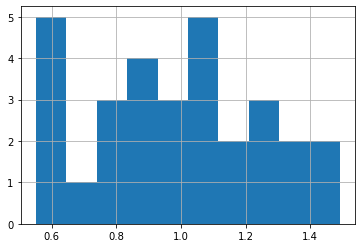

In [93]:
beta_series = pd.Series(beta_estimates)
beta_series.hist()

For this excercise you used 20 years of data to estimate the betas. What problems might there be with this approach?

The data may be skewed by years with unusual or extreme market conditions that would not be useful in informing the returns of a typical year, such as the 2008 recession or the 2020 pandemic.